In [1]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size':15})

In [8]:
def plot_comparison(stat_func, measure, defined_dir, dynamic_dir):
    
    year = 2019
    months = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
    n_months = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
    n_clusters = [500, 1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500, 5000]
    
    # Carregamento dos dados
    defined_scores = np.load('{0}/{1}_{2}.npy'.format(defined_dir, year, measure))
    dynamic_scores = np.load('{0}/{1}_{2}.npy'.format(dynamic_dir, year, measure))
    
    # Novos dados de acordo a função estatística
    defined = stat_func(defined_scores, axis=0)
    dynamic = stat_func(dynamic_scores, axis=0)
    
    # Valores mínimos e máximos
    vmin = min(defined.min(), dynamic.min())
    vmax = max(defined.max(), dynamic.max())
    
    # Ajustes dos quadros internos e externos
    fig, ((ax1, ax2)) = plt.subplots(1, 2, figsize=(20, 7))
    ax0 = fig.add_subplot(111, frameon=False)
    
    # Informações dos quadros internos
    ax1 = sns.heatmap(data=defined, ax=ax1, vmin=vmin, vmax=vmax, cbar=False, annot=True, fmt='.2f', yticklabels=n_clusters, xticklabels=n_months)
    ax1.set_title('Número de Agrupamento Definido')

    ax2 = sns.heatmap(data=[dynamic], ax=ax2, vmin=vmin, vmax=vmax, cbar=False, annot=True, fmt='.2f', yticklabels=False, xticklabels=n_months)
    ax2.set_title('Número de Agrupamento Dinâmico')
    
    # Ajustes do quadro externo
    plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
    ax0.set_xlabel('Número de Meses Anteriores', labelpad=20)
    ax0.set_ylabel('Número de Agrupamentos', labelpad=20)
    ax1.tick_params(axis='y', rotation=0)
    plt.tight_layout()
    plt.savefig('figures/comparison_{0}_{1}.png'.format(measure, stat_func.__name__), dpi=300)
    plt.show()

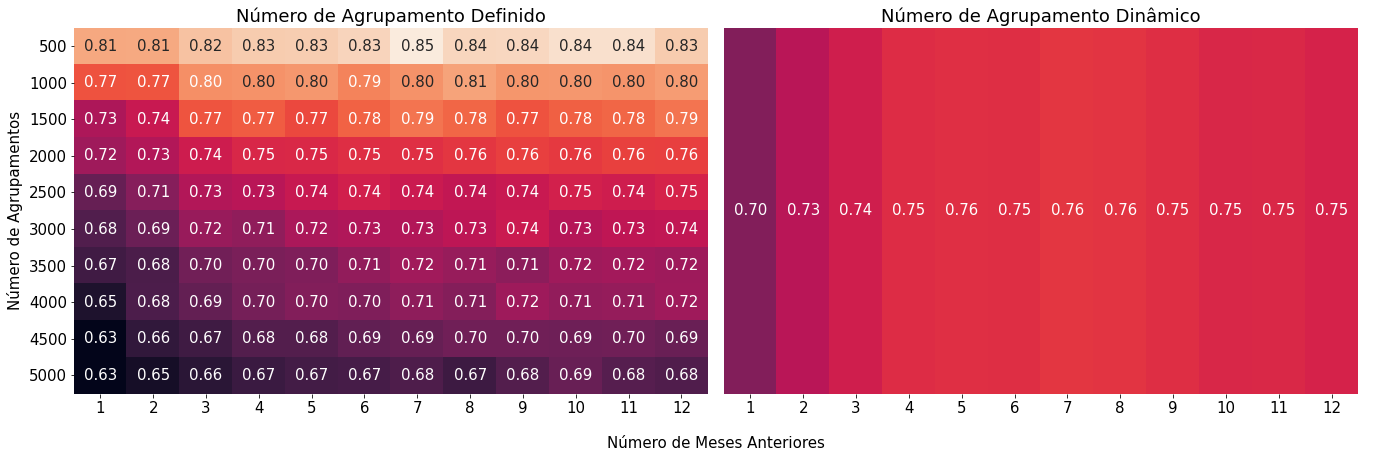

In [9]:
plot_comparison(np.mean, 'accuracy', 'scores_defined_lr', 'scores_dynamic_lr')

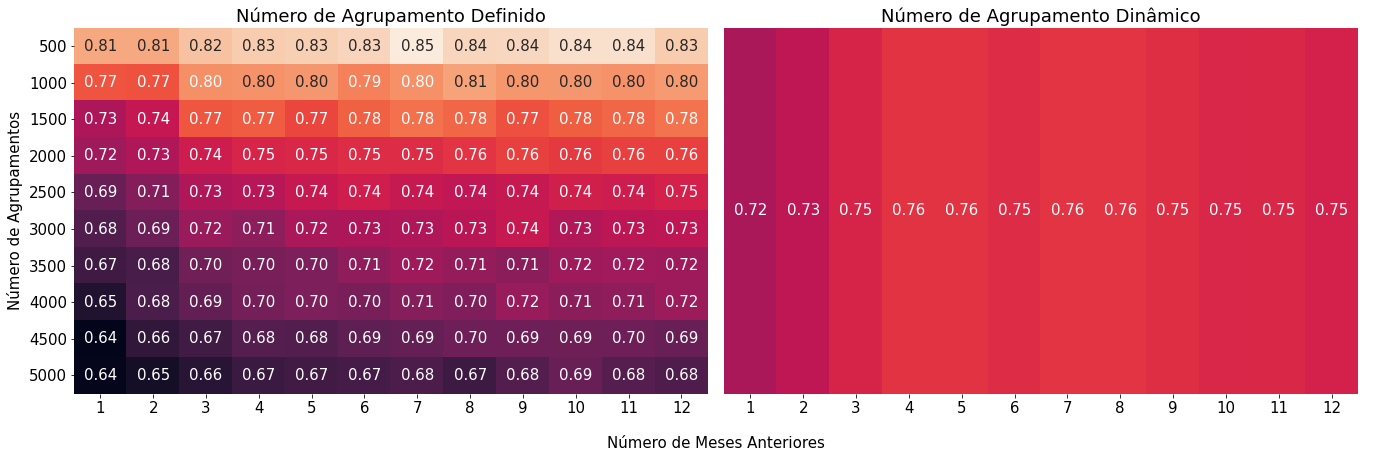

In [10]:
plot_comparison(np.mean, 'f1', 'scores_defined_lr', 'scores_dynamic_lr')

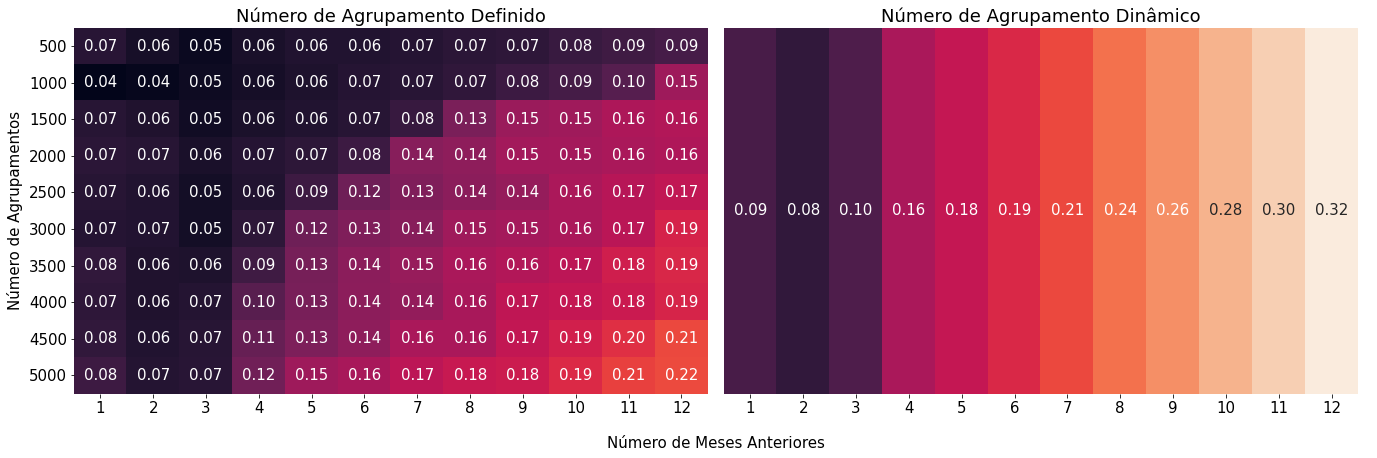

In [11]:
plot_comparison(np.mean, 'time', 'scores_defined_lr', 'scores_dynamic_lr')